# Introdução

Uma forma alternativa de realizar ajustes de brilho é contraste é por meio de transformaçãoes no espaço de vetorial da imagem da seguinte forma:
$$ H(x,y) = T.F(x,y) $$
Em particular a transformação representada pela letra T pode ser representada pela (i) transformação linear e (ii) trasnformação exponencial.

A trasnformação linear traduz utiliza os valores de pixel como entradas da equação da reta de transformação:
$$ S = c.F(x,y) + b $$
Os parâmetros c e b representam ajustes de contrase e brilho respectivamente.

Enquanto que a transformação exponencial é traduzida pela seguinte transformação:
$$ S = c.F(x,y)^\gamma $$

O parâmetro c é responsável pelo o ajuste de contraste e o parametro $\gamma$ pelo brilho.

# Discussões sobre os métodos

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- Abrir imagem:

In [2]:
img = np.array(cv2.imread('lena_gray_256.tif', cv2.IMREAD_GRAYSCALE))
rows, cols = img.shape

## Ajuste de contraste e brilho

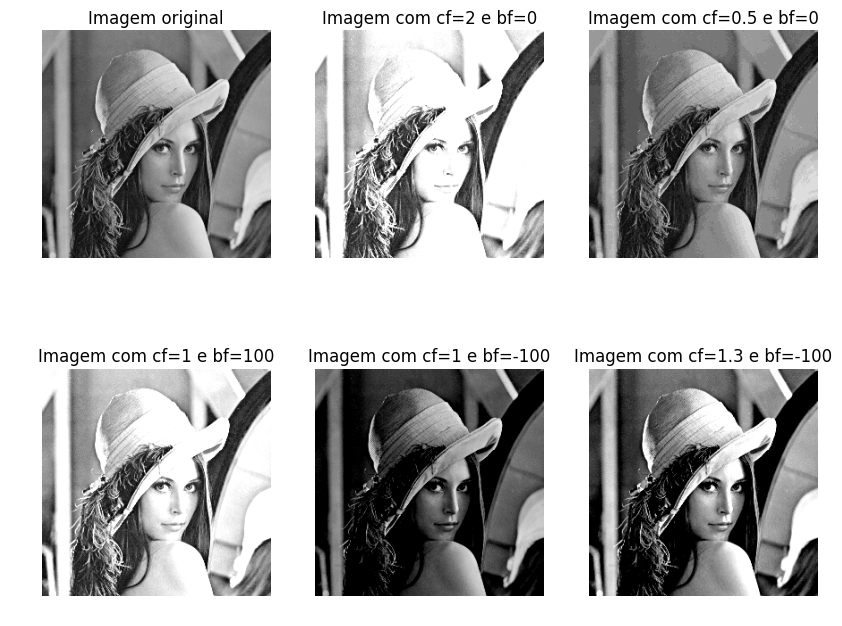

In [3]:
cf = 2

bf = 0

imgMul = cv2.multiply(img, cf)
imgT1 = np.uint8(cv2.add(imgMul,bf))

cf = 0.07
bf = 0

imgMul = cv2.multiply(img, cf)
imgT2 = np.uint8(cv2.add(imgMul,bf))

cf = 1
bf = 100

imgMul = cv2.multiply(img, cf)
imgT3 = np.uint8(cv2.add(imgMul,bf))

cf = 1
bf = 100

imgMul = cv2.multiply(img, cf)
imgT4 = np.uint8(cv2.subtract(imgMul,bf))


cf = 1.3
bf = 100

imgMul = cv2.multiply(img, cf)
imgT5 = np.uint8(cv2.subtract(imgMul,bf))


plt.figure(1,figsize=(10,8))
plt.subplot(231)
plt.imshow(img, 'gray')
plt.axis('OFF')
plt.title("Imagem original")

plt.subplot(232)
plt.imshow(imgT1, 'gray')
plt.axis('OFF')
plt.title("Imagem com cf=2 e bf=0")

plt.subplot(233)
plt.imshow(imgT2,'gray')
plt.axis('OFF')
plt.title("Imagem com cf=0.5 e bf=0")

plt.subplot(234)
plt.imshow(imgT3,'gray')
plt.axis('OFF')
plt.title("Imagem com cf=1 e bf=100")

plt.subplot(235)
plt.imshow(imgT4, 'gray')
plt.axis('OFF')
plt.title("Imagem com cf=1 e bf=-100")

plt.subplot(236)
plt.imshow(imgT5,'gray')
plt.axis('OFF')
plt.title("Imagem com cf=1.3 e bf=-100")

plt.show()

O ajuste linear de contraste e brilho é bastante versátil, pois apenas com o ajuste dos parâmetros cf de contraste e bf de brilho pode-se promover correções na iluminação da imagem.

Valores maiores que 1 no ajuste do contraste promovem clareamentos na imagem, enquanto que valores menores resultam em escurecimento das regioes. O ajuste do brilho com valores maiores que 0 tornam a imagem mais clara e valores menores que zero, tornam a imagem mais escura.

## Correção de gamma

In [4]:
def gammaAdj(image, gamma):
    newimage = image/255
    newimage = newimage**(1/gamma)
    newimage = np.uint8(newimage*255)
    return newimage

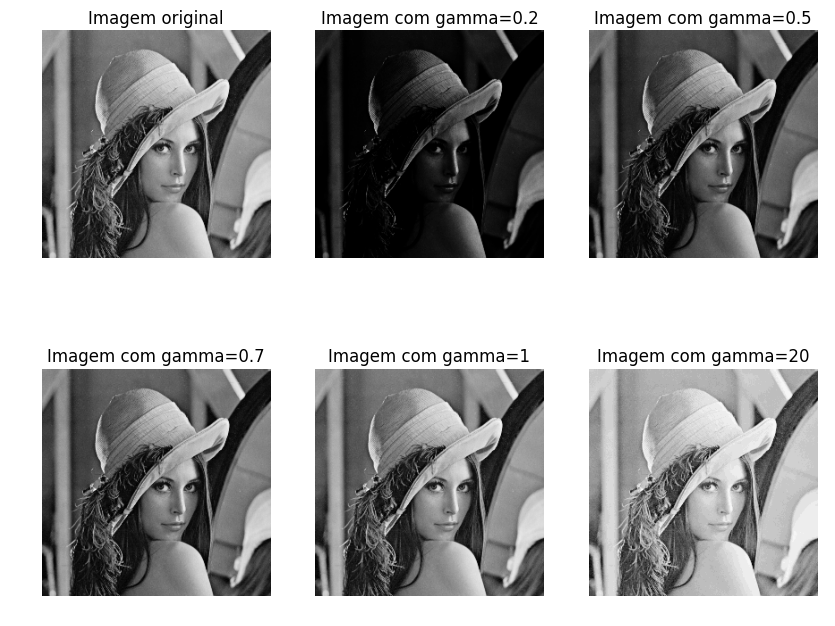

In [5]:
imgTG1 = gammaAdj(img,0.2)
imgTG2 = gammaAdj(img,0.5)
imgTG3 = gammaAdj(img,0.7)
imgTG4 = gammaAdj(img,1)
imgTG5 = gammaAdj(img,20)

plt.figure(1,figsize=(10,8))
plt.subplot(231)
plt.imshow(img, 'gray')
plt.axis('OFF')
plt.title("Imagem original")

plt.subplot(232)
plt.imshow(imgTG1, 'gray')
plt.axis('OFF')
plt.title("Imagem com gamma=0.2")

plt.subplot(233)
plt.imshow(imgTG2,'gray')
plt.axis('OFF')
plt.title("Imagem com gamma=0.5")

plt.subplot(234)
plt.imshow(imgTG3,'gray')
plt.axis('OFF')
plt.title("Imagem com gamma=0.7")

plt.subplot(235)
plt.imshow(imgTG4, 'gray')
plt.axis('OFF')
plt.title("Imagem com gamma=1")

plt.subplot(236)
plt.imshow(imgTG5,'gray')
plt.axis('OFF')
plt.title("Imagem com gamma=20")

plt.show()

O ajuste não linear de gamma opera sobre duas regiões: (i) gamma com valores menores que 1 realçam detalhes escuros, pois tornam a faixa de valores escuros mais homogênea enquanto que (ii) gamma com valores maiores que 1 realçam detalhes que originalmente eram claros. 

Por ser uma operação não linear o ajuste de gamma é inerante das características originais da imagem da seguinte forma: imagens com predominância de intensidade claras são menos suceptíveis ao ajuste de gama para clareamentos e mais susceptíveis ao ajuste de gamma para regiões escuras, e o contrário também é válido.

# Conclusões

Os ajustes de intensidade por correção de contraste, brilho ou gamma são operações sólidas para o processamento de imagens. Os ajustes de gamma promovem resultados com base nas características de cores da imagem original, enquanto que o ajuste linear de contraste e brilho é uma operação única que garante a qualquer imagem características similares.